<a href="https://colab.research.google.com/github/samyYZ/BizBot/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

df=pd.read_csv('/content/Admission_Predict_Ver1.1.csv')
df.head()
print(df.shape)
print("missing_values:\n",df.isnull().sum())


(500, 9)
missing_values:
 Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [4]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [5]:
df["Chance of Admit "]=df["Chance of Admit "].apply(lambda x:1 if x>0.5 else 0)

In [8]:
X = df.drop("Chance of Admit ", axis=1)
y=df['Chance of Admit ']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Traing_data.shape",X_train.shape)
print("Testing_data.shape",X_test.shape)


Traing_data.shape (400, 7)
Testing_data.shape (100, 7)


In [10]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_pred = model.predict(X_test)

In [13]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9
Confusion Matrix:
 [[ 4  5]
 [ 5 86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.44      0.44         9
           1       0.95      0.95      0.95        91

    accuracy                           0.90       100
   macro avg       0.69      0.69      0.69       100
weighted avg       0.90      0.90      0.90       100



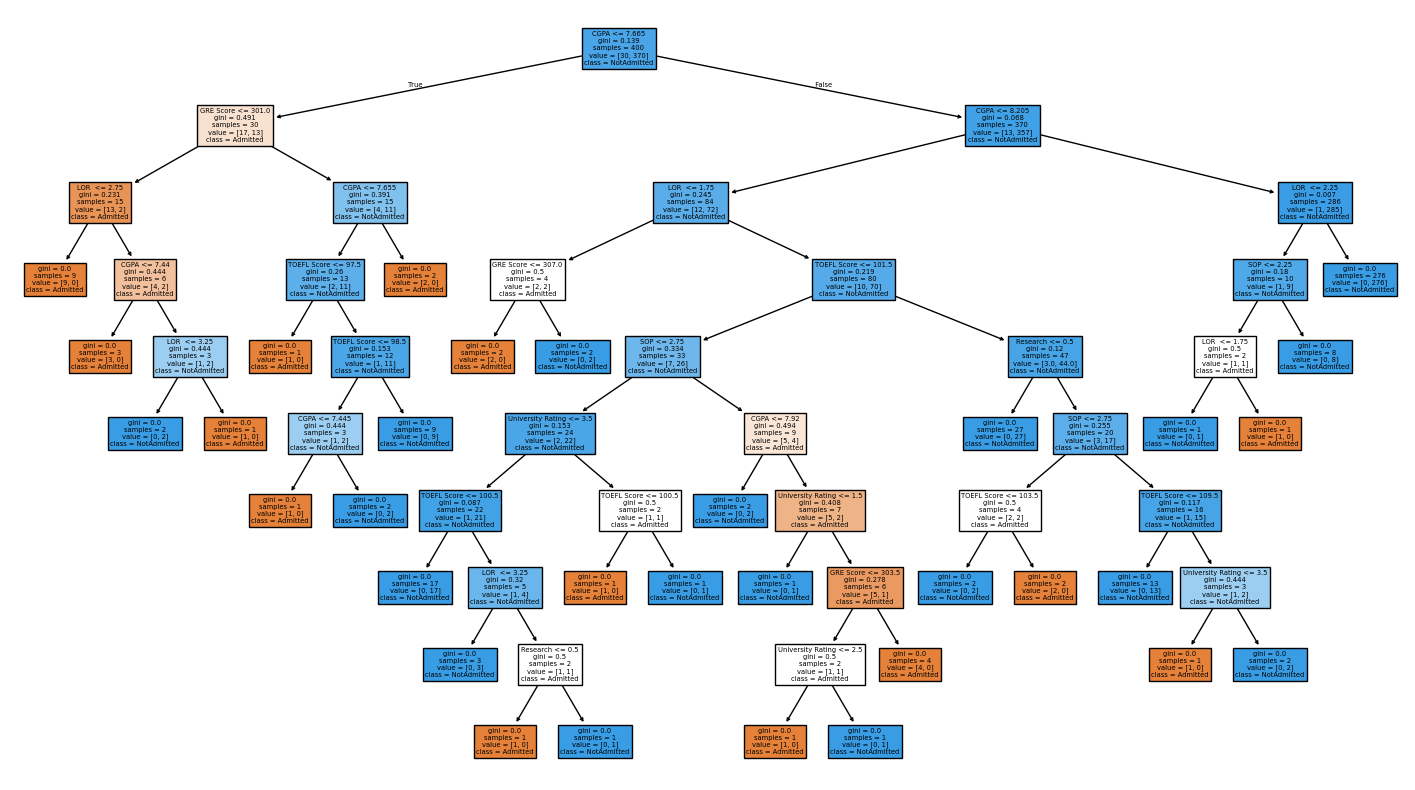

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18,10))
plot_tree(model,feature_names=X.columns,class_names=['Admitted','NotAdmitted'],filled=True)
plt.show()